<a href="https://colab.research.google.com/github/dantecomedia/Google-Stock-Prediciton/blob/master/google_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
ls


drive/  sample_data/


In [14]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing the training set
dataset_train=pd.read_csv("/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")
training_set=dataset_train.iloc[:,1:2]

#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

#create a datastructure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
    
#Reshaping
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
 
#Intialzing the RNN
regressor=Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(X_train,y_train, epochs=100,batch_size=32)

dataset_test=pd.read_csv("/content/drive/My Drive/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")
real_stock_price=dataset_test.iloc[:,1:2].values

dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs) 
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)



Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0636
Epoch 2/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [============================

In [9]:
ls

'My Drive'/


In [10]:
cd My\ Drive


/content/drive/My Drive


In [11]:
ls


'Colab Notebooks'/
 consentletter.gdoc
 dataset/
 Idea_submission_main.gslides
 Idea_submission_template20Dec.gslides
 Idea_submission_template20Dec.pptx
'IMG_20190116_131406~2 (1).jpg'
 IMG_20190116_131406~2.jpg
 Recurrent_Neural_Networks/
'Smart India Hackathon 2019 - Problem 2 - Patient Case Similarity.gdoc'
 stock_market_dataset.zip
 stock_prediction/
 Untitled0.ipynb


In [12]:
cd Recurrent_Neural_Networks/

/content/drive/My Drive/Recurrent_Neural_Networks


In [13]:
ls

google_stock_price.py        Google_Stock_Price_Train.csv
Google_Stock_Price_Test.csv  rnn.py


In [15]:
predicted_stock_price

array([[785.75195],
       [782.8586 ],
       [783.4425 ],
       [785.0819 ],
       [788.6732 ],
       [794.7616 ],
       [799.89197],
       [801.405  ],
       [801.2212 ],
       [800.8205 ],
       [800.76355],
       [800.86224],
       [801.04266],
       [801.87506],
       [802.9466 ],
       [807.9311 ],
       [815.0319 ],
       [822.3107 ],
       [825.5718 ],
       [820.0124 ]], dtype=float32)

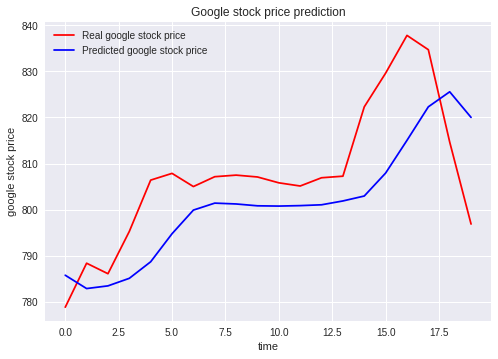

In [16]:
plt.plot(real_stock_price,color="red",label="Real google stock price")
plt.plot(predicted_stock_price,color="blue",label="Predicted google stock price")
plt.title("Google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()